# Creating a Convoluted Neural Network

Lets's start by defining what a Convoluted Neural Network, also known a CNN is.

A CNN is a feed-forward neural network that learns features via filter optimization. What is the differente between a CNN and the usual NN we have been running so far?

CNN uses a certain grid or kernel that is passed or slided through the matrix layer and performs convoluted operation, obtaining an activated layer as a result.

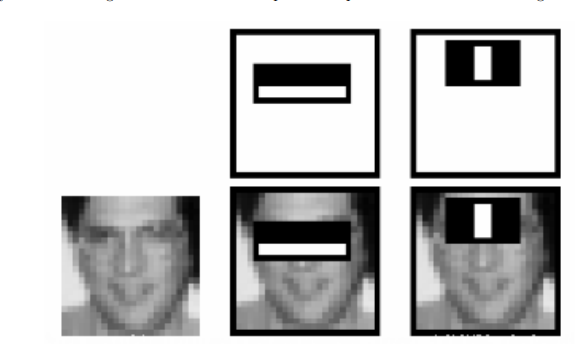

This is the process used i.e. for detecting faces when processing an image, as we use these combination of kernels or feature detectors to confirm that there is a certain object we aim to idetinfy.

## Architecture differences between CNN and NN

Another thing we will take a look in depth when running an example are the differences in the structural architecture we have between the NN we have run so far in other examples and the CNN. 

While the NN can have a simple structure ( we have at least opted to do so before. It may contain more layers and more complex structure for more complex problems, of course ), the CNN on the other hand has a particular order for layers, where it mixes convolutional and pooling layers through the network, ending with fully connected layers and a classification layer.

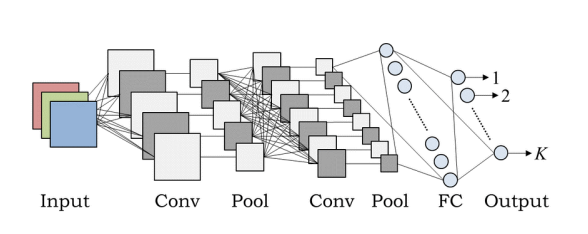

As the CNN has great capabilities for identification, normally we use non-binary classification for multiple classes. On this example, we would go for binary classification as we will work with the classification between two types of food first from the repository [Food-101](https://www.kaggle.com/datasets/dansbecker/food-101).

## Loading the data.

I have downloaded the [Food-101](https://www.kaggle.com/datasets/dansbecker/food-101) repository and substracted and divided two of the classes we have there and divided them into training and test folders in a 70-30 relation.


In [1]:
!ls ../Sources/food-101

steak  sushi


In [2]:
!ls ../Sources/food-101/steak

test  train


In [3]:
import os

for dirpath, dirnames, filenames in os.walk("../Sources/food-101"):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 2 Directories and 0 images in '../Sources/food-101'.
 2 Directories and 0 images in '../Sources/food-101/sushi'.
 0 Directories and 300 images in '../Sources/food-101/sushi/test'.
 0 Directories and 700 images in '../Sources/food-101/sushi/train'.
 2 Directories and 0 images in '../Sources/food-101/steak'.
 0 Directories and 300 images in '../Sources/food-101/steak/test'.
 0 Directories and 700 images in '../Sources/food-101/steak/train'.


Taking a look to what some of the training images look like :

In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def DisplayImage(directory_path,food):
  '''
  Function to display a random image from one of the trainining
  folders for our food CNN

  Args:
  directory_path : Path to our source folder.
  food: Name of food folder we want to display an image from.
  
  return:
  img.shape : shape of the image file.
  '''
  # define path variables
  local_path = directory_path + "/" + food + "/train/"
  random_image = random.sample(os.listdir(local_path), 1)

  # 
  img = mpimg.imread(local_path + "/" + random_image[0])
  plt.imshow(img)
  plt.title(food)
  plt.axis("off");

  return img

(384, 512, 3)

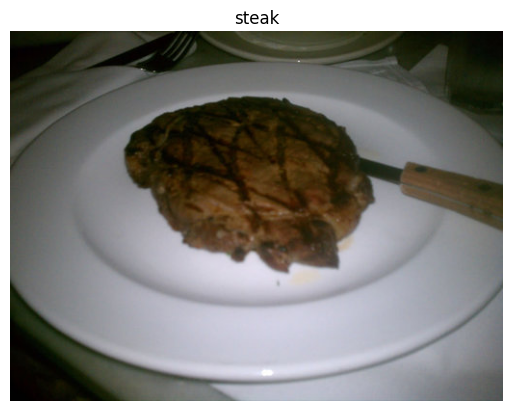

In [5]:
source_path = "../Sources/food-101"
train_image = DisplayImage(source_path,"steak")
train_image.shape

Examining different images, we can see how the image comes in the 3 color channel RGB and also comes in different sizes. Some of them are 512x512 but there other sizes as well (384x512,307x512).

If we have some basic knowledge from computer vision, we also know that images are represented on these 3 channels from 0 to 255 values. As we know NN work better with lower values, we can normalize the values of the images by dividing their values by 255. This means that instead of having a range of 0-255, we will have in our inputs a range of 0-1.

## Creating our CNN

When creating a new CNN, we know already from creating a NN all the hyperparameters we need to have in mind to tweak to improve the efficiency of the network. An extra layer of complexity comes into the CNN for deciding what kind of layers and how to mix them to have an efficient feed-forward process, extract and mantain the characeristics of substracted for the classification of the images.

We can take a look to guide us at the start of some previous sucessful CNNs to start our experiment.

In [6]:
import tensorflow as tf

2025-01-29 15:11:24.539652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738156284.559017    1345 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738156284.564142    1345 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 15:11:24.582393: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


For this example, I have decided to use as a reference [AlexNet](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), one of the firsts and most influencial CNNs created.

Why using Alexnet? For this example, we want to show a CNN that has an acceptable performance with a low computational cost.

### Define the CNN architecture

Alexnet has 5 convolutional layers, with some of them followed by max-pooling layers, and 3 fully-connected layers with a final output layer using softmax function.

Let's try to recreate its structure by using Tensorflow models.

In [7]:
# aLEXNET

In [8]:

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
 # 1st Conv
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 2nd Conv
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 3rd Conv
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 4th Conv
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 5th Conv
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

 # Flatten layers
    tf.keras.layers.Flatten(),

 # 1st Fully Connected 
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
 # 2nd Fully Connected  
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

 # Output Layer 
 tf.keras.layers.Dense(1, activation="sigmoid") 
])


/home/david/venv39gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738156287.067756    1345 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


### Ensuring the use of GPU for tensorflow operations

One thing to note here is that executing the code of the CNNs can be very demanding as the matrix operations executed are handling millions of float operations.

Let's make sure tensorflow is using GPU :

In [9]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


We will check that we obtain an error if we use a GPU that is not listed.

In [12]:
tf.debugging.set_log_device_placement(True)

In [13]:
from tensorflow.python.framework.errors_impl import InvalidArgumentError 

# Disable automatic fallback to an available device
tf.debugging.set_log_device_placement(True)
tf.config.set_soft_device_placement(False)


try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:5'):
    a = tf.constant([[1.0, 2.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    c = tf.matmul(a, b)
except InvalidArgumentError as e:
    print(f"Caught InvalidArgumentError: {e}")

Caught InvalidArgumentError: Could not satisfy device specification '/job:localhost/replica:0/task:0/device:GPU:5'. enable_soft_placement=0. Supported device types [GPU, CPU]. All available devices [/job:localhost/replica:0/task:0/device:GPU:0, /job:localhost/replica:0/task:0/device:CPU:0].


Now, we choose to enable back soft device placement so we know that Tensorflow will try to use the GPUs available for the operations:

In [25]:
from tensorflow.python.framework.errors_impl import InvalidArgumentError 
# Disable automatic fallback to an available device
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)


try:
  # Specify an invalid GPU device, but noe soft device placement is true
  with tf.device('/device:GPU:0'):
    a = tf.constant([[1.0, 2.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    c = tf.matmul(a, b)
except Exception  as e:
    print(f"Caught InvalidArgumentError: {e}")

We can see how now Tensorflow is correctly using the GPU device we have available. Let's continue and try to train our CNN!